# Ground water level prediction

## Mst Nazneen Aktar
## Md. Abdullah-Al Mamun

# 1. Introduction

## About the dataset


Data collected from meteorological stations in Rangpur, Nilphamari, and Dinajpur was obtained from various sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was originally in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This comprehensive dataset covers the period from 1993 to 2017.
## Data
<strong> 1. Ground water level(m) data for 12 selected wells from the Bangladesh Water Development Board (BWDB)</strong>
- Water_Level

<strong> 2. The daily (which then converted to monthly) temperature( 0°C )</strong>

- Tave

<strong> 3. The daily (which then converted to monthly) rainfall(mm) </strong>
- PRCP
<strong> 4. MODIS Normalized Difference Vegetation Index (NDVI)</strong>
- NDVI

<strong> 5. Indian Ocean Dipole (IOD)
- IOD
    
<strong> 6. Southern Oscillation Index (SOI)</strong>
- SOI
    
<strong> . Nina3.4 Value
- Nina
    
<strong> 8. MEI Value
- MEI
    


## Identify the features and the targets


## Features(Independent Variables):

1. Temperature (°C) - Tave (converted to monthly)
2. Rainfall (mm) - PRCP (converted to monthly)
3. MODIS Normalized Difference Vegetation Index (NDVI) - NDVI
4. Indian Ocean Dipole (IOD) - IOD
5. Southern Oscillation Index (SOI) - SOI
6. Nina3.4 Value - Nina
7. MEI Value - MEI

## Target:

1. Groundwater level (m) - Water_Level
The goal of your predictive model is to use these features to predict the groundwater level. 


### NB: Professor's Special Recommendations:

1. Hybrid Modeling
2. Hyperparameter Tuning
3. Consider Bayesian Optimization
4. Novel Approach
5. Review Previous Papers

### Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GWL_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_GWL_Three_location merged all data.xlsx')  # Specify the header row number
GWL_df

,Year,Month,Rangpur-27 Satgora Mistripara (Rangpur Sadar),Rangpur-28 (Aviram dakhin panapukur),Rangpur-61 (Mithapikur),Saidpur-29 (Nilphamari),Saidpur-30 ( Nilphamari),"Saidpur-44 (Nilphamari, Sadar)",Saidpur-54 (Nilphamari),Dinajpur-34 (Dinajpur Sadar),...,Rangpur_PRCP,Sayedpur_PRCP,Dinajpur_PRCP,Rangpur_NDVI,Sayedpur_NDVI,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
0,1993,1,3.2860,2.956000,2.488000,3.110000,4.718000,1.8880,3.934000,4.518000,...,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925
1,1993,2,2.9600,2.833333,2.733333,2.996667,4.063333,1.9700,3.706667,4.373333,...,0,0,0,0.1041,0.1579,0.1388,0.010194,-7.9,0.42,1.049
2,1993,3,4.0825,3.887500,4.732500,4.300000,4.470000,2.5300,4.357500,5.245000,...,30,45,29,0.1847,0.1459,0.1668,-0.323575,-8.5,0.47,1.177
3,1993,4,3.4000,3.177500,3.835000,4.085000,4.370000,2.1225,3.882500,4.817500,...,62,58,82,0.1085,0.1365,0.1465,-0.056840,-21.1,0.92,1.440
4,1993,5,3.5700,3.486000,3.544000,4.038000,4.112000,2.4460,4.162000,4.800000,...,190,201,308,0.1219,0.1872,0.1435,0.312997,-8.2,0.93,1.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2017,8,2.3725,1.535000,5.237500,1.462500,3.887500,1.8100,2.392500,1.937500,...,784,603,640,0.1597,0.1596,0.2086,0.362385,3.3,-0.18,-0.436
296,2017,9,2.7250,1.900000,4.517500,1.580000,3.997500,1.9175,3.042500,4.450000,...,321,165,210,0.2281,0.2759,0.2259,0.236626,6.9,-0.56,-0.267
297,2017,10,2.9040,2.122000,4.644000,1.718000,3.800000,2.2100,3.406000,4.820000,...,0,246,0,0.1576,0.1674,0.2012,0.740942,9.1,-0.52,-0.261
298,2017,11,1.9460,1.752000,3.964000,1.560000,3.810000,1.9800,3.462000,4.380000,...,2,1,1,0.2403,0.2338,0.2210,0.278548,11.8,-0.84,-0.379


In [3]:
 # Specify the header row number

GWL_df = GWL_df.rename(columns={'Sayedpur_Tave': 'Saidpur_Tave','Sayedpur_PRCP': 'Saidpur_PRCP', 'Sayedpur_NDVI': 'Saidpur_NDVI'})
GWL_df

,Year,Month,Rangpur-27 Satgora Mistripara (Rangpur Sadar),Rangpur-28 (Aviram dakhin panapukur),Rangpur-61 (Mithapikur),Saidpur-29 (Nilphamari),Saidpur-30 ( Nilphamari),"Saidpur-44 (Nilphamari, Sadar)",Saidpur-54 (Nilphamari),Dinajpur-34 (Dinajpur Sadar),...,Rangpur_PRCP,Saidpur_PRCP,Dinajpur_PRCP,Rangpur_NDVI,Saidpur_NDVI,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
0,1993,1,3.2860,2.956000,2.488000,3.110000,4.718000,1.8880,3.934000,4.518000,...,49,38,42,0.1763,0.1948,0.1638,-0.025962,-8.2,0.28,0.925
1,1993,2,2.9600,2.833333,2.733333,2.996667,4.063333,1.9700,3.706667,4.373333,...,0,0,0,0.1041,0.1579,0.1388,0.010194,-7.9,0.42,1.049
2,1993,3,4.0825,3.887500,4.732500,4.300000,4.470000,2.5300,4.357500,5.245000,...,30,45,29,0.1847,0.1459,0.1668,-0.323575,-8.5,0.47,1.177
3,1993,4,3.4000,3.177500,3.835000,4.085000,4.370000,2.1225,3.882500,4.817500,...,62,58,82,0.1085,0.1365,0.1465,-0.056840,-21.1,0.92,1.440
4,1993,5,3.5700,3.486000,3.544000,4.038000,4.112000,2.4460,4.162000,4.800000,...,190,201,308,0.1219,0.1872,0.1435,0.312997,-8.2,0.93,1.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2017,8,2.3725,1.535000,5.237500,1.462500,3.887500,1.8100,2.392500,1.937500,...,784,603,640,0.1597,0.1596,0.2086,0.362385,3.3,-0.18,-0.436
296,2017,9,2.7250,1.900000,4.517500,1.580000,3.997500,1.9175,3.042500,4.450000,...,321,165,210,0.2281,0.2759,0.2259,0.236626,6.9,-0.56,-0.267
297,2017,10,2.9040,2.122000,4.644000,1.718000,3.800000,2.2100,3.406000,4.820000,...,0,246,0,0.1576,0.1674,0.2012,0.740942,9.1,-0.52,-0.261
298,2017,11,1.9460,1.752000,3.964000,1.560000,3.810000,1.9800,3.462000,4.380000,...,2,1,1,0.2403,0.2338,0.2210,0.278548,11.8,-0.84,-0.379


In [4]:
column_names = ['Year', 'Month', 'Region', 'Well', 'Tave', 'PRCP', 'NDVI', 'IOD', 'SOI', 'Nina', 'MEI', 'Water_Level']
df = pd.DataFrame(columns=column_names)
for index, row in GWL_df.iterrows():
    Year = row['Year']
    Month = row['Month']
    IOD = row['IOD_Value']
    SOI = row['SOI_Value']
    Nina = row['Nina3.4_Value']
    MEI = row['MEI_Value']
    for column in GWL_df.columns[2:14]:
        Region = column.split('-')[0]
        Well = column.split('-')[1].split()[0]
        PRCP = GWL_df.loc[index, Region+'_PRCP']
        NDVI = GWL_df.loc[index, Region+'_NDVI']
        Tave = GWL_df.loc[index, Region+'_Tave']
        Water_Level = GWL_df.loc[index, column]
        # Create a new row for the target DataFrame
        new_row = {'Year':Year, 'Month':Month, 'Region':Region, 'Well':Well, 'PRCP':PRCP, 'Tave': Tave,
                   'NDVI':NDVI, 'IOD':IOD, 'SOI':SOI, 'Nina':Nina, 'MEI':MEI, 'Water_Level':Water_Level}
        df0 = pd.DataFrame(new_row, index=[0])
        df = pd.concat([df, df0], axis=0, ignore_index=True)
#         df = df.append(new_row, ignore_index=True)

C:\Users\35840\AppData\Local\Temp\ipykernel_20060\1880462062.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df0], axis=0, ignore_index=True)


In [5]:
df
df.to_excel('GWL_main_with_well.xlsx', index=False)

In [6]:
column_names = df.columns.tolist()
column_names

['Year',
 'Month',
 'Region',
 'Well',
 'Tave',
 'PRCP',
 'NDVI',
 'IOD',
 'SOI',
 'Nina',
 'MEI',
 'Water_Level']

In [7]:
df['PRCP'] = df['PRCP'].astype(float)
df['Well'] = df['Well'].astype(int)

In [8]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3600 non-null   float64
 1   Month        3600 non-null   float64
 2   Region       3600 non-null   object 
 3   Well         3600 non-null   int32  
 4   Tave         3600 non-null   float64
 5   PRCP         3600 non-null   float64
 6   NDVI         3600 non-null   float64
 7   IOD          3600 non-null   float64
 8   SOI          3600 non-null   float64
 9   Nina         3600 non-null   float64
 10  MEI          3600 non-null   float64
 11  Water_Level  3600 non-null   float64
dtypes: float64(10), int32(1), object(1)
memory usage: 323.6+ KB


In [9]:
description_data = round(df.describe(), 2). T
description_data

,count,mean,std,min,25%,50%,75%,max
Year,3600.0,2005.00,7.21,1993.00,1999.00,2005.00,2011.00,2017.00
Month,3600.0,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Well,3600.0,44.08,14.21,27.00,29.75,41.00,58.00,64.00
Tave,3600.0,25.85,11.74,12.40,22.10,26.90,28.90,306.00
PRCP,3600.0,172.89,203.22,0.00,3.00,81.00,296.50,1026.00
NDVI,3600.0,0.20,0.07,0.01,0.14,0.18,0.24,0.45
IOD,3600.0,0.00,0.34,-0.89,-0.20,-0.02,0.21,1.47
SOI,3600.0,-0.48,10.73,-28.60,-7.80,0.10,7.70,27.10
Nina,3600.0,0.01,0.87,-1.79,-0.56,-0.08,0.48,2.57
MEI,3600.0,-0.01,1.04,-1.96,-0.77,-0.23,0.60,3.21


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Targets (Ground Water Levels)
targets = ['Water_Level']

# Features
features = ['Year', 'Month', 'Tave', 'PRCP', 'NDVI', 'IOD', 'SOI', 'Nina', 'MEI']


# the independent variables set
X = df[features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Calculate tolerance
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data

,feature,VIF,Tolerance
0,Year,15.722888,0.063602
1,Month,4.826240,0.207201
2,Tave,6.360971,0.157209
3,PRCP,1.918724,0.521180
4,NDVI,8.931459,0.111964
5,IOD,1.190812,0.839763
6,SOI,2.183408,0.458000
7,Nina,2.554721,0.391432
8,MEI,1.533772,0.651987


In [11]:
# Checking the missing values in each coulmn
missing_values = df.isnull().sum()
missing_values

Year           0
Month          0
Region         0
Well           0
Tave           0
PRCP           0
NDVI           0
IOD            0
SOI            0
Nina           0
MEI            0
Water_Level    0
dtype: int64

<a id="Encoding"></a>

## Label Encoding Categorical Columns


In [12]:
from sklearn.preprocessing import LabelEncoder

def Label_Encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

df = Label_Encoder(df)

df.to_excel('labelled_GW.xlsx', index=False)

df

,Year,Month,Region,Well,Tave,PRCP,NDVI,IOD,SOI,Nina,MEI,Water_Level
0,1993.0,1.0,1,27,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925,3.286000
1,1993.0,1.0,1,28,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
2,1993.0,1.0,1,61,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925,2.488000
3,1993.0,1.0,2,29,16.5,38.0,0.1948,-0.025962,-8.2,0.28,0.925,3.110000
4,1993.0,1.0,2,30,16.5,38.0,0.1948,-0.025962,-8.2,0.28,0.925,4.718000
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2017.0,12.0,0,34,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404,5.133333
3596,2017.0,12.0,0,38,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.623333
3597,2017.0,12.0,0,57,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404,7.326667
3598,2017.0,12.0,0,63,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800000


# 2. Data Exploration and Analysis
## Visualizing the distribution

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


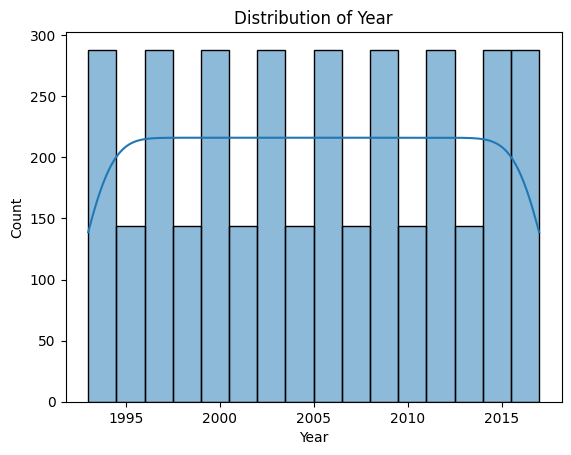

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


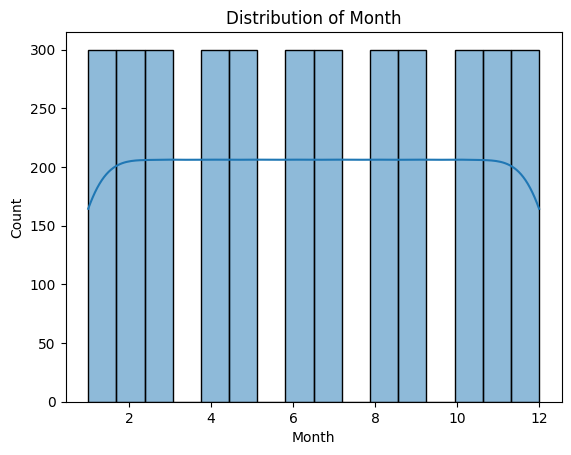

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


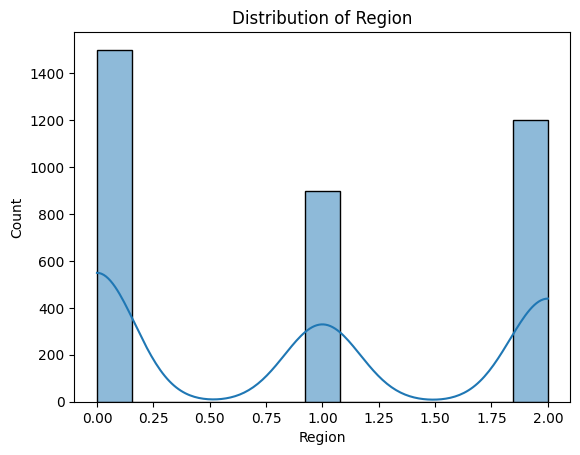

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


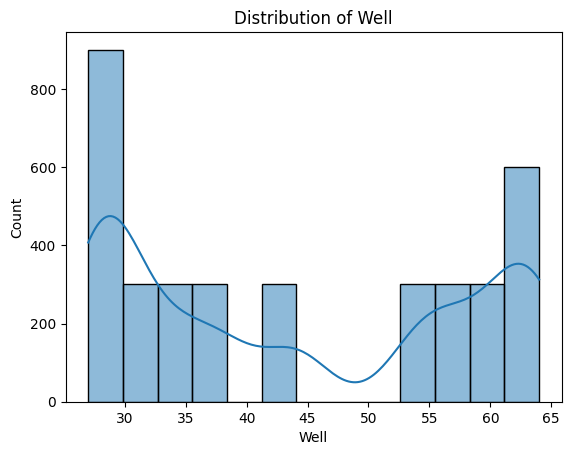

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


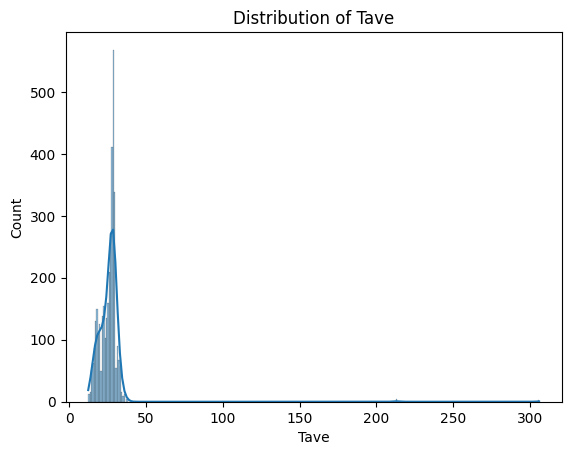

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


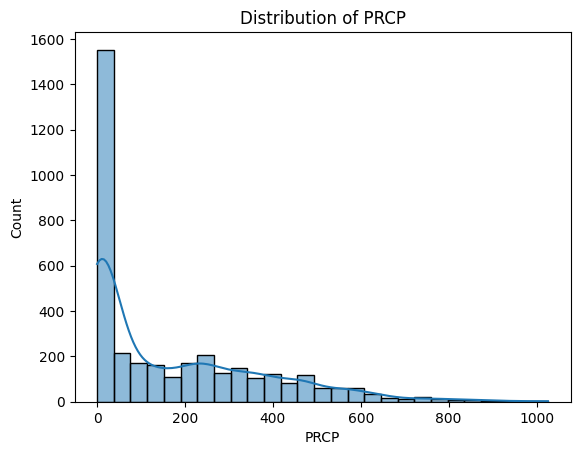

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


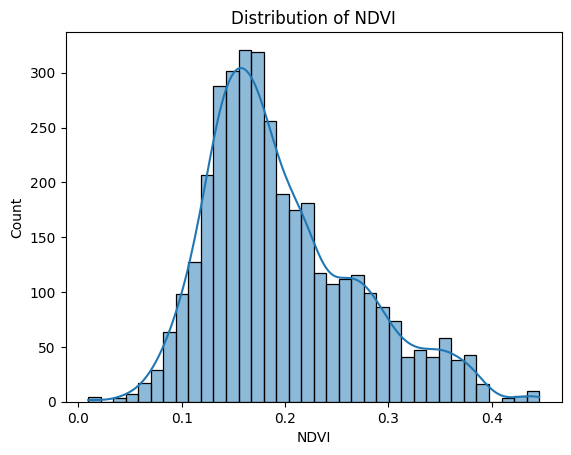

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


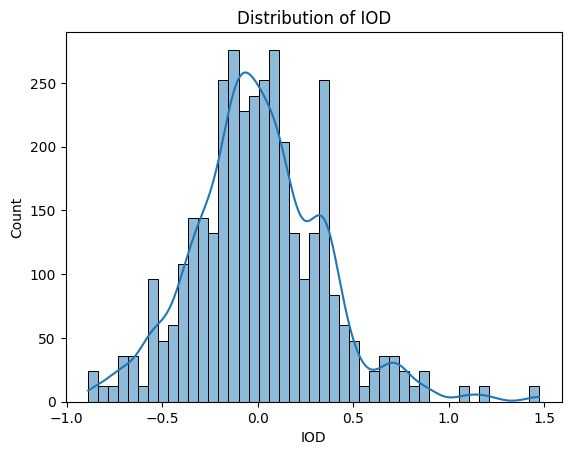

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


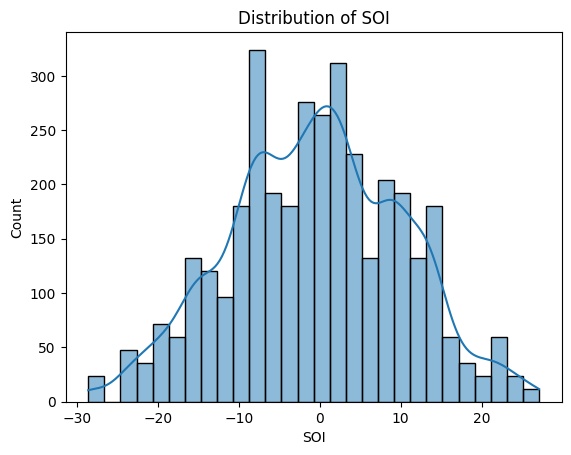

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


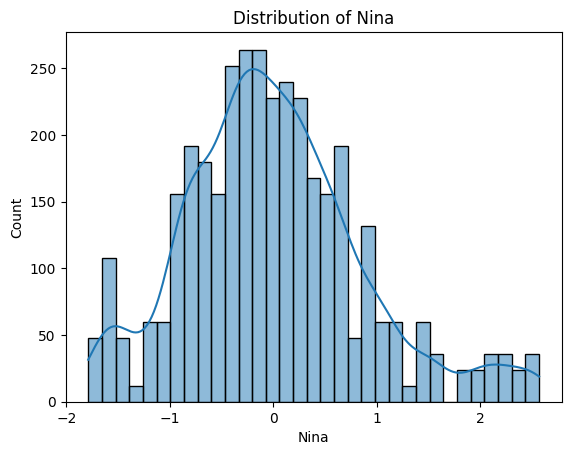

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


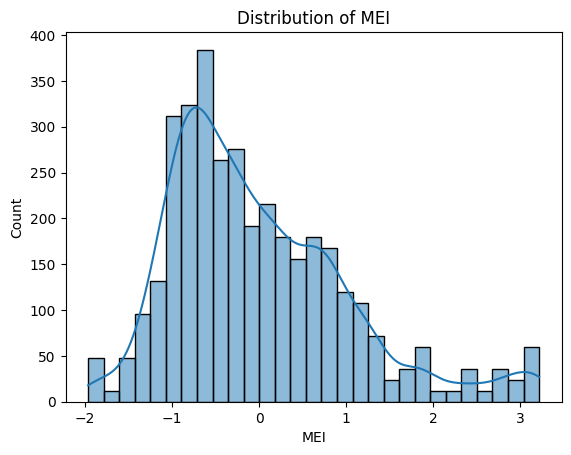

D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jupyter\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


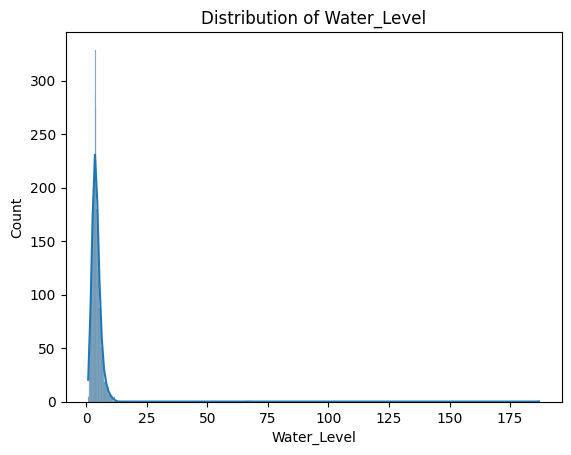

In [13]:
def plot_distribution(df):
    for column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(df)

## Visualizing the time series

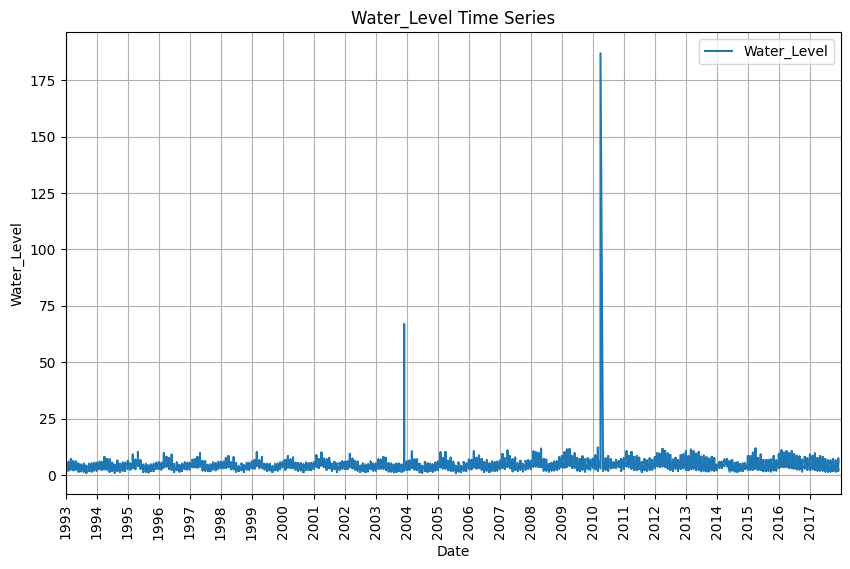

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_selected_columns(columns):
    # Load the data
    df = pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWL_main_with_well.xlsx')

    # Filter data for years 1993 to 2017
    df = df[(df['Year'] >= 1993) & (df['Year'] <= 2017)]

    # Create a time index using the Year and Month columns
    time_index = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    # Plot selected columns
    for column in columns:
        if column not in df.columns:
            print(f"Column '{column}' not found in the dataset.")
            continue

        column_data = df[column]

        plt.figure(figsize=(10, 6))
        plt.plot(time_index, column_data, label=f'{column}')
        plt.xlabel('Date')
        plt.ylabel(f'{column}')
        plt.title(f'{column} Time Series')
        plt.legend()
        plt.grid(True)

        # Set x-axis locator to display every year
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))

        # Format x-axis labels as years
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

        # Set x-axis limits
        plt.xlim(pd.Timestamp('1993-01-01'), pd.Timestamp('2017-12-31'))
                # Rotate x-axis tick labels
        plt.xticks(rotation=90)

        plt.show()

# Define a list of columns to visualize
selected_columns = ['Water_Level']

# Call the function with selected columns
visualize_selected_columns(selected_columns)

#### For Dinajpur-63 and Dinajpur-64, potential outliers have been identified and should be removed from the dataset.

## Data Cleaning,Checking errors, Missing values

In [15]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [16]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [20]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [21]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

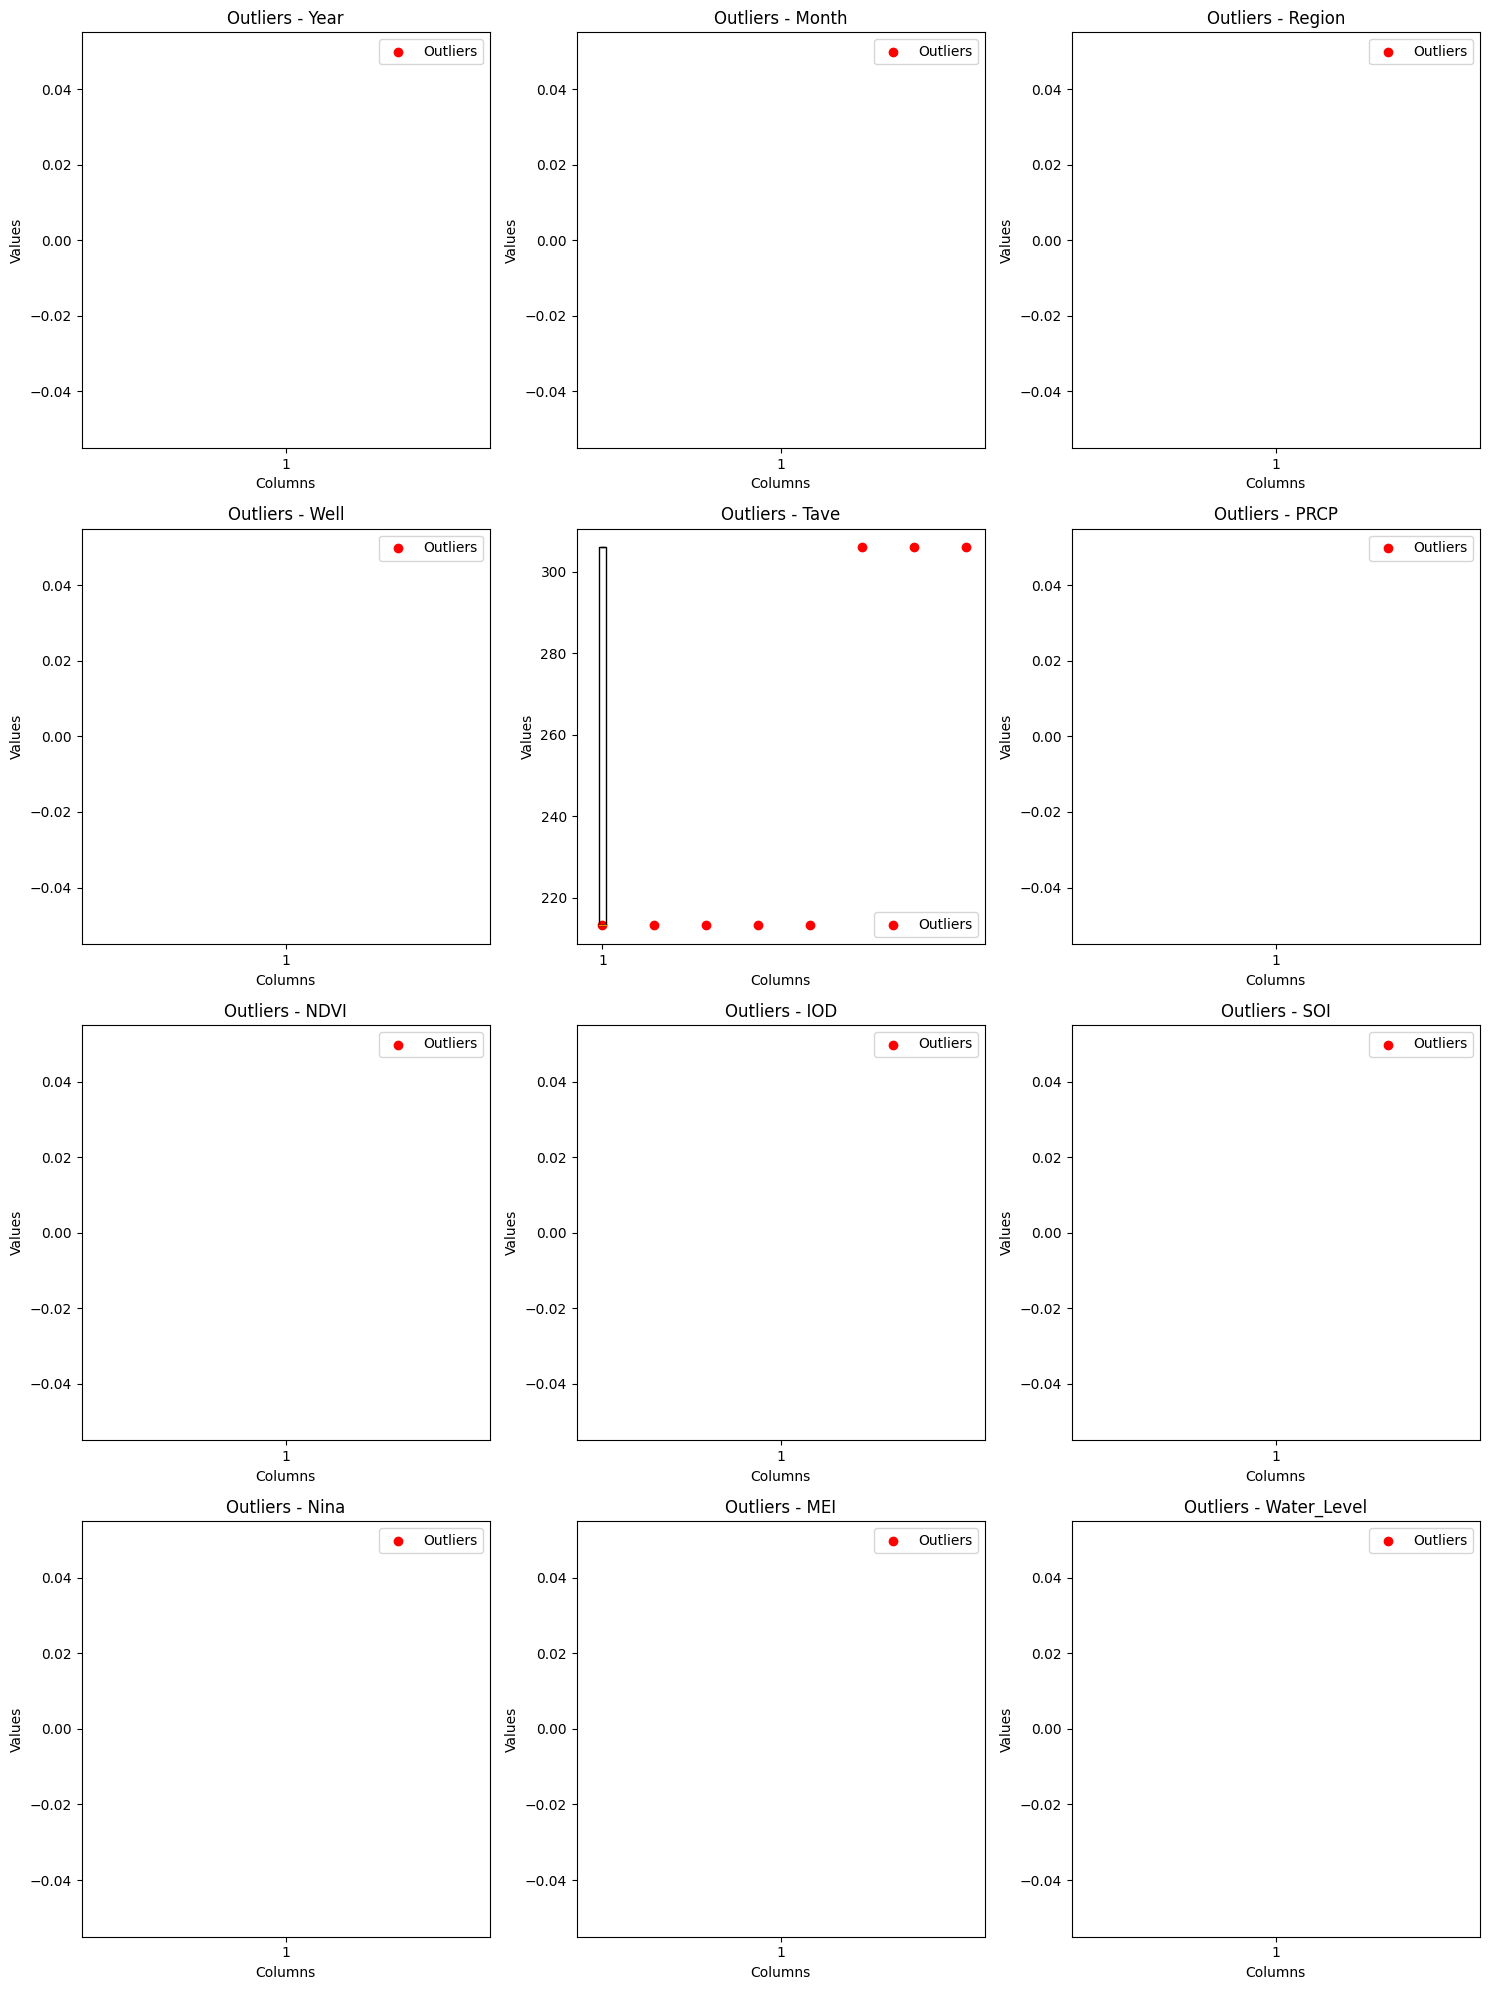

Number of total outliers: 589


In [22]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

# Outlier handling

In [23]:
# Calculate mean values for numeric columns
mean_values = df[numeric_columns].mean()

# Replace outliers with mean values
for column in numeric_columns:
    outliers = all_outliers[column]
    if not outliers.empty:
        df.loc[outliers.index, column] = mean_values[column]

# Check if outliers are replaced
print("Outliers replaced with mean values.")

Outliers replaced with mean values.


C:\Users\35840\AppData\Local\Temp\ipykernel_20060\590488655.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9166666666666666' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, column] = mean_values[column]
C:\Users\35840\AppData\Local\Temp\ipykernel_20060\590488655.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '44.083333333333336' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[outliers.index, column] = mean_values[column]


#### NB: In the following two areas, outliers have been detected. These values deviate significantly from the average; for instance, the mean value is approximately 6, but there are extreme values exceeding 66. To address this, I have replaced these outliers with their respective mean values.

In [1]:
df[['Water_Level']].describe()

NameError: name 'df' is not defined

In [25]:
# Calculate the 99.5th percentile value for the specified columns
threshold = df[['Water_Level']].quantile(0.995)

# Filter the DataFrame to get values greater than the threshold
outliers_Water_Level = df['Water_Level'] > threshold['Water_Level']


# Get the rows where the values exceed the threshold
outliers_Water_Level = df.loc[outliers_Water_Level, 'Water_Level']

In [26]:
outliers_Water_Level

1582     66.820000
2062     10.850000
2218     11.683333
2338     11.305000
2350     11.560000
2482     12.157500
2495    186.982500
2506     10.970000
2614     10.505000
2782     11.622500
2794     10.766000
2890     10.530000
2914     11.250000
2926     10.598333
3214     11.752500
3334     10.952500
3358     10.632000
3382     10.597500
Name: Water_Level, dtype: float64

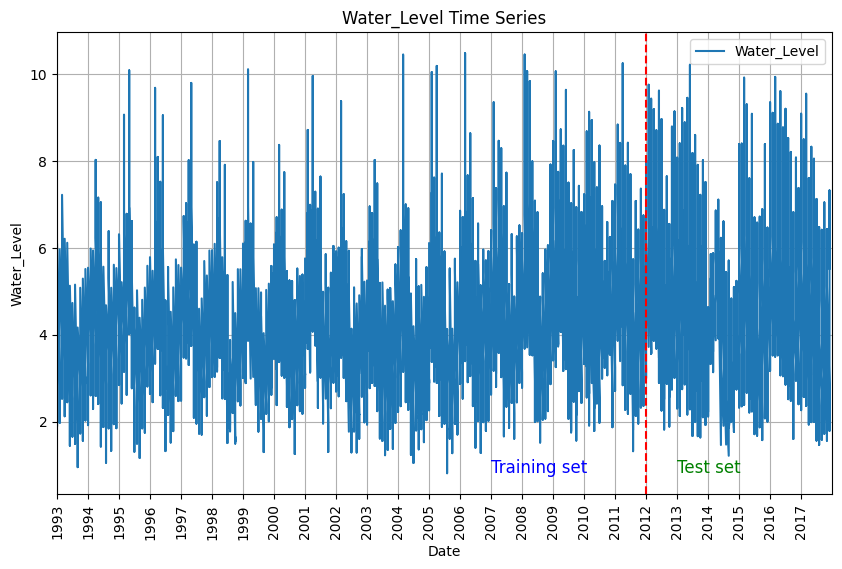

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_selected_columns(columns):
    # Load the data
    df = pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWL_main_with_well.xlsx')

    # Filter data for years 1993 to 2017
    df = df[(df['Year'] >= 1993) & (df['Year'] <= 2017)]

    # Calculate mean values for numeric columns
    numeric_columns = df.select_dtypes(include=['float64']).columns
    mean_values = df[numeric_columns].mean()

    # Replace outliers with mean values
    for column in numeric_columns:
        quantile_995 = df[column].quantile(0.995)
        df.loc[df[column] > quantile_995, column] = mean_values[column]

    # Create a time index using the Year and Month columns
    time_index = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    # Plot selected columns
    for column in columns:
        if column not in df.columns:
            print(f"Column '{column}' not found in the dataset.")
            continue

        column_data = df[column]

        plt.figure(figsize=(10, 6))
        plt.plot(time_index, column_data, label=f'{column}')
        plt.xlabel('Date')
        plt.ylabel(f'{column}')
        plt.title(f'{column} Time Series')
        plt.legend()
        plt.grid(True)

        # Set x-axis locator to display every year
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))

        # Format x-axis labels as years
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

        # Set x-axis limits
        plt.xlim(pd.Timestamp('1993-01-01'), pd.Timestamp('2017-12-31'))

        # Add a red dashed line for the year 2012
        plt.axvline(pd.Timestamp('2012-01-01'), color='red', linestyle='--')

        # Add text labels
        plt.text(pd.Timestamp('2007-01-01'), column_data.min(), 'Training set', fontsize=12, color='blue')
        plt.text(pd.Timestamp('2013-01-01'), column_data.min(), 'Test set', fontsize=12, color='green')

        # Rotate x-axis tick labels
        plt.xticks(rotation=90)

        plt.show()

# Define a list of columns to visualize
selected_columns = ['Water_Level']

# Call the function with selected columns
visualize_selected_columns(selected_columns)


## Transformation

In [28]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: Region
Transformation recommended for column: Well
Transformation recommended for column: Tave
Transformation recommended for column: PRCP
Transformation recommended for column: NDVI
Transformation recommended for column: IOD
Transformation recommended for column: SOI
No transformation needed for column: Nina
Transformation recommended for column: MEI
Transformation recommended for column: Water_Level


D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Jupyter\lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


# Splitting the data into traing set and test set

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Feature rankings

In [31]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X_train.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
random_state = 42  # Set any integer value as seed
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the feature importance dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# the feature rankings
print("Feature ranking using PCA - Explained Variance Ratio:")
print(explained_variance_df)
print("\nFeature ranking using Random Forest - Feature Importance:")
print(feature_importance_df)

Feature ranking using PCA - Explained Variance Ratio:
   Feature  Explained Variance Ratio
0     Year              9.910897e-01
1    Month              4.730279e-03
2   Region              2.926361e-03
3     Well              6.627562e-04
4     Tave              3.217455e-04
5     PRCP              2.287541e-04
6     NDVI              1.889660e-05
7      IOD              1.448639e-05
8      SOI              4.612779e-06
9     Nina              2.279636e-06
10     MEI              1.047326e-07

Feature ranking using Random Forest - Feature Importance:
   Feature  Importance
3     Well    0.347559
2   Region    0.141489
8      SOI    0.113360
9     Nina    0.099623
7      IOD    0.086832
1    Month    0.075013
0     Year    0.049523
5     PRCP    0.026147
4     Tave    0.022692
6     NDVI    0.020632
10     MEI    0.017129


# Model building and prediction

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=42)

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Predict on the validation set
rf_pred_val = random_forest.predict(X_val)

# Calculate evaluation metrics for validation set
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Print evaluation metrics for validation set
print("Random Forest Validation RMSE:", rf_rmse_val)
print("Random Forest Validation MAE:", rf_mae_val)
print("Random Forest Validation R-squared:", rf_r2_val)

# Now, let's test on the actual test set (Years 2013 to 2017)
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)]['Water_Level']

# Predict on the test set
rf_pred_test = random_forest.predict(X_test)

# Calculate evaluation metrics for test set
rf_rmse_test = mean_squared_error(y_test, rf_pred_test, squared=False)
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

# Print evaluation metrics for test set
print("\nRandom Forest Test RMSE:", rf_rmse_test)
print("Random Forest Test MAE:", rf_mae_test)
print("Random Forest Test R-squared:", rf_r2_test)

Random Forest Validation RMSE: 2.730804728619183
Random Forest Validation MAE: 0.5539557668295497
Random Forest Validation R-squared: 0.18585939227857318

Random Forest Test RMSE: 1.3754627074320638
Random Forest Test MAE: 0.9104978956081694
Random Forest Test R-squared: 0.4700159240197569


In [33]:
# actual and predicted values for validation set
df_val = pd.DataFrame({'Actual Values': y_val.values, 'Predicted Values': rf_pred_val})
print("Validation Set:")
df_val

Validation Set:


,Actual Values,Predicted Values
0,5.014000,4.744277
1,3.690000,3.283230
2,3.538000,3.399463
3,2.355000,2.659327
4,2.314000,2.360028
...,...,...
572,2.596667,2.554814
573,3.564000,3.147477
574,4.950000,4.292613
575,3.995000,3.802657


In [34]:
# actual and predicted values for test set

df_test = pd.DataFrame({'Actual Values': y_test.values, 'Predicted Values': rf_pred_test})
print("\nTest Set:")
df_test


Test Set:


,Actual Values,Predicted Values
0,3.620000,3.380237
1,3.598000,3.309147
2,4.412000,3.481847
3,2.302000,3.885023
4,3.854000,3.971522
...,...,...
712,5.133333,4.495465
713,4.623333,4.093260
714,7.326667,6.786438
715,4.800000,6.310947


<Figure size 1600x800 with 0 Axes>

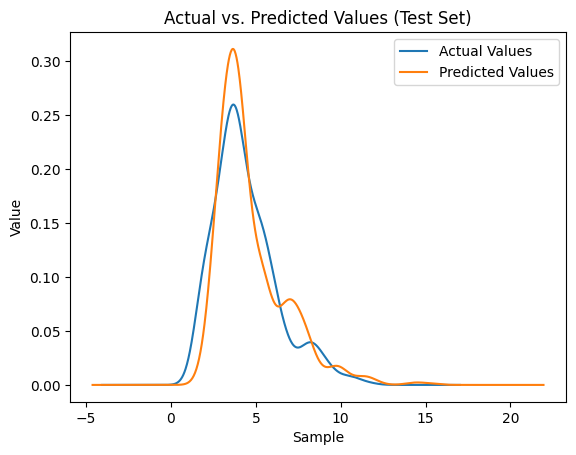

In [35]:
# Plot the bar chart
plt.figure(figsize=(16, 8))
df_test.plot(kind='density')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.show()

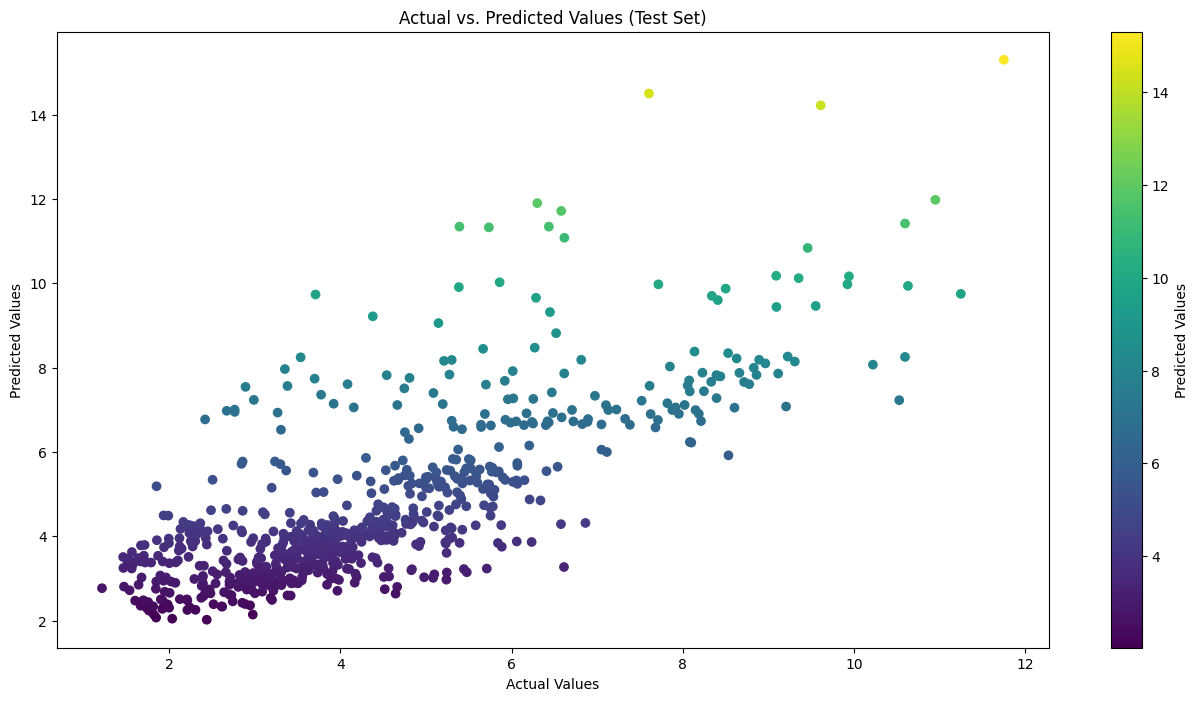

In [36]:
# Plot the scatter chart with hexbin coloring
plt.figure(figsize=(16, 8))

plt.scatter(df_test['Actual Values'], df_test['Predicted Values'], c=df_test['Predicted Values'], cmap='viridis')
plt.colorbar(label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

plt.show()

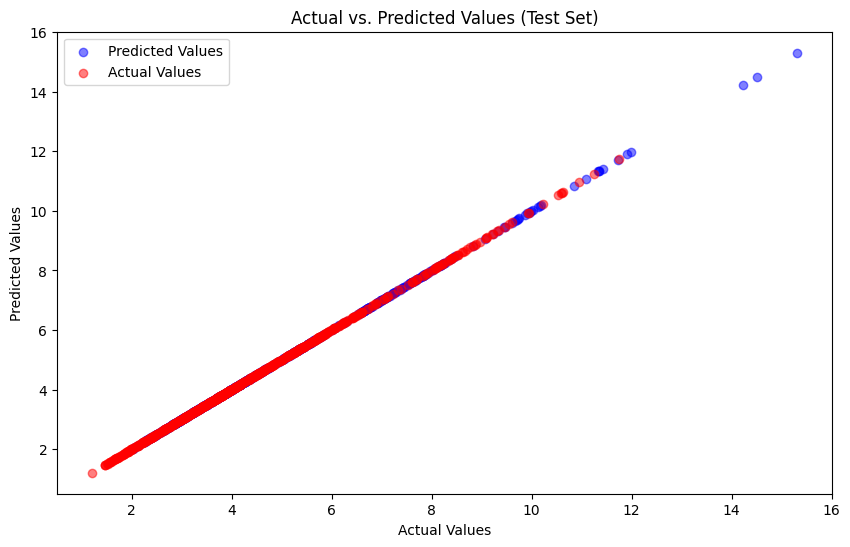

In [48]:
# Create a scatter plot with different colors for predicted and actual values
plt.figure(figsize=(10, 6))

# Plot predicted values with one color
plt.scatter(
    df_test['Predicted Values'], 
    df_test['Predicted Values'], 
    color='blue',  # Use blue for predicted values
    label='Predicted Values',
    alpha=0.5
)

# Plot actual values with another color
plt.scatter(
    df_test['Actual Values'], 
    df_test['Actual Values'],  # Using actual values on both axes for clarity
    color='red',  # Use red for actual values
    label='Actual Values',
    alpha=0.5
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Add a legend
plt.legend()

plt.show()

In [52]:
# actual and predicted values for validation set
df_val = pd.DataFrame({'Actual Values': y_val.values, 'Predicted Values': rf_pred_val})
print("Validation Set:")
df_val

Validation Set:


,Actual Values,Predicted Values
0,5.014000,4.744277
1,3.690000,3.283230
2,3.538000,3.399463
3,2.355000,2.659327
4,2.314000,2.360028
...,...,...
572,2.596667,2.554814
573,3.564000,3.147477
574,4.950000,4.292613
575,3.995000,3.802657


In [54]:
# Standard Scaling
actual_values_scaled = scaler.fit_transform(df_val['Actual Values'].values.reshape(-1, 1))
predicted_values_scaled = scaler.transform(df_val['Predicted Values'].values.reshape(-1, 1))

# Create a DataFrame
df_new = pd.DataFrame({'Actual Values (Scaled)': actual_values_scaled.flatten(), 'Predicted Values (Scaled)': predicted_values_scaled.flatten()})
print("Standard scaling:")
print(df_new)


Standard scaling:
     Actual Values (Scaled)  Predicted Values (Scaled)
0                  0.284379                   0.195258
1                 -0.153090                  -0.287493
2                 -0.203313                  -0.249088
3                 -0.594193                  -0.493640
4                 -0.607740                  -0.592532
..                      ...                        ...
572               -0.514343                  -0.528172
573               -0.194722                  -0.332348
574                0.263232                   0.046022
575               -0.052314                  -0.115867
576               -0.354643                  -0.430069

[577 rows x 2 columns]


In [55]:
# Inverse Scaling
actual_values_original = scaler.inverse_transform(actual_values_scaled)
predicted_values_original = scaler.inverse_transform(predicted_values_scaled)

# Create a DataFrame
df_original = pd.DataFrame({'Actual Values (Original)': actual_values_original.flatten(), 'Predicted Values (Original)': predicted_values_original.flatten()})
print("Reverse Scaling:")
print(df_original)


Reverse Scaling:
     Actual Values (Original)  Predicted Values (Original)
0                    5.014000                     4.744277
1                    3.690000                     3.283230
2                    3.538000                     3.399463
3                    2.355000                     2.659327
4                    2.314000                     2.360028
..                        ...                          ...
572                  2.596667                     2.554814
573                  3.564000                     3.147477
574                  4.950000                     4.292613
575                  3.995000                     3.802657
576                  3.080000                     2.851723

[577 rows x 2 columns]


In [34]:
# actual and predicted values for test set

df_test = pd.DataFrame({'Actual Values': y_test.values, 'Predicted Values': rf_pred_test})
print("\nTest Set:")
df_test


Test Set:


,Actual Values,Predicted Values
0,3.620000,3.380237
1,3.598000,3.309147
2,4.412000,3.481847
3,2.302000,3.885023
4,3.854000,3.971522
...,...,...
712,5.133333,4.495465
713,4.623333,4.093260
714,7.326667,6.786438
715,4.800000,6.310947


<Figure size 1600x800 with 0 Axes>

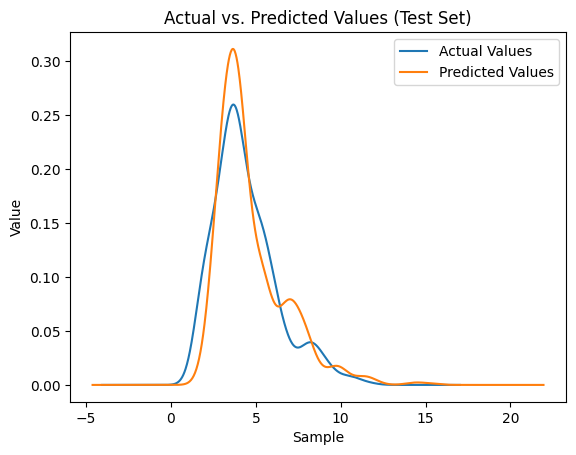

In [35]:
# Plot the bar chart
plt.figure(figsize=(16, 8))
df_test.plot(kind='density')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.show()

# Base models

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tbats import TBATS
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import AdaBoostRegressor



random_state = 42 

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=random_state)
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()
krr = KernelRidge()
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_kernel = make_pipeline(StandardScaler(), PolynomialFeatures(3), LinearRegression())
rbf_kernel = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10, random_state=random_state))
gpr = GaussianProcessRegressor(random_state=random_state)
weighted_knn = KNeighborsRegressor(weights='distance')
lightgbm = LGBMRegressor(random_state=random_state)
catboost = CatBoostRegressor(random_state=random_state, verbose=0)
xgb_model = XGBRegressor()
lgb_regressor = lgb.LGBMRegressor()
gbr = GradientBoostingRegressor(random_state=random_state)
abr = AdaBoostRegressor(random_state=random_state)
svr = SVR()

# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
krr.fit(X_train, y_train)
poly_reg.fit(X_train, y_train)
poly_kernel.fit(X_train, y_train)
rbf_kernel.fit(X_train, y_train)
gpr.fit(X_train, y_train)
weighted_knn.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_regressor.fit(X_train, y_train)
gbr.fit(X_train, y_train)
abr.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Train and evaluate Linear Regression
linear_pred_val = linear_regression.predict(X_val)
linear_rmse_val = mean_squared_error(y_val, linear_pred_val, squared=False)
linear_mae_val = mean_absolute_error(y_val, linear_pred_val)
linear_r2_val = r2_score(y_val, linear_pred_val)

# Train and evaluate Decision Tree
dt_pred_val = decision_tree.predict(X_val)
dt_rmse_val = mean_squared_error(y_val, dt_pred_val, squared=False)
dt_mae_val = mean_absolute_error(y_val, dt_pred_val)
dt_r2_val = r2_score(y_val, dt_pred_val)

# Train and evaluate Random Forest
rf_pred_val = random_forest.predict(X_val)
rf_rmse_val = mean_squared_error(y_val, rf_pred_val, squared=False)
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Train and evaluate Ridge Regression
ridge_pred_val = ridge.predict(X_val)
ridge_rmse_val = mean_squared_error(y_val, ridge_pred_val, squared=False)
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)

# Train and evaluate Lasso Regression
lasso_pred_val = lasso.predict(X_val)
lasso_rmse_val = mean_squared_error(y_val, lasso_pred_val, squared=False)
lasso_mae_val = mean_absolute_error(y_val, lasso_pred_val)
lasso_r2_val = r2_score(y_val, lasso_pred_val)

# Train and evaluate ElasticNet Regression
enet_pred_val = elastic_net.predict(X_val)
enet_rmse_val = mean_squared_error(y_val, enet_pred_val, squared=False)
enet_mae_val = mean_absolute_error(y_val, enet_pred_val)
enet_r2_val = r2_score(y_val, enet_pred_val)

# Train and evaluate K-Nearest Neighbors
knn_pred_val = knn.predict(X_val)
knn_rmse_val = mean_squared_error(y_val, knn_pred_val, squared=False)
knn_mae_val = mean_absolute_error(y_val, knn_pred_val)
knn_r2_val = r2_score(y_val, knn_pred_val)

# Train and evaluate Gaussian Process
gp_pred_val = gaussian_process.predict(X_val)
gp_rmse_val = mean_squared_error(y_val, gp_pred_val, squared=False)
gp_mae_val = mean_absolute_error(y_val, gp_pred_val)
gp_r2_val = r2_score(y_val, gp_pred_val)

# Train and evaluate Kernel Ridge Regression

krr_pred_val = krr.predict(X_val)
krr_rmse_val = mean_squared_error(y_val, krr_pred_val, squared=False)
krr_mae_val = mean_absolute_error(y_val, krr_pred_val)
krr_r2_val = r2_score(y_val, krr_pred_val)

# Train and evaluate Polynomial Regression
poly_reg_pred_val = poly_reg.predict(X_val)
poly_reg_rmse_val = mean_squared_error(y_val, poly_reg_pred_val, squared=False)
poly_reg_mae_val = mean_absolute_error(y_val, poly_reg_pred_val)
poly_reg_r2_val = r2_score(y_val, poly_reg_pred_val)

# Train and evaluate Poly Kernel
poly_kernel_pred_val = poly_kernel.predict(X_val)
poly_kernel_rmse_val = mean_squared_error(y_val, poly_kernel_pred_val, squared=False)
poly_kernel_mae_val = mean_absolute_error(y_val, poly_kernel_pred_val)
poly_kernel_r2_val = r2_score(y_val, poly_kernel_pred_val)

# Train and evaluate RBF Kernel
rbf_kernel_pred_val = rbf_kernel.predict(X_val)
rbf_kernel_rmse_val = mean_squared_error(y_val, rbf_kernel_pred_val, squared=False)
rbf_kernel_mae_val = mean_absolute_error(y_val, rbf_kernel_pred_val)
rbf_kernel_r2_val = r2_score(y_val, rbf_kernel_pred_val)

# Train and evaluate Gaussian Process Regression
gpr_pred_val = gpr.predict(X_val)
gpr_rmse_val = mean_squared_error(y_val, gpr_pred_val, squared=False)
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)

# Train and evaluate Weighted K-NN
wknn_pred_val = weighted_knn.predict(X_val)
wknn_rmse_val = mean_squared_error(y_val, wknn_pred_val, squared=False)
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)

# Train and evaluate Gradient Boosting Regressor
gbr_pred_val = gbr.predict(X_val)
gbr_rmse_val = mean_squared_error(y_val, gbr_pred_val, squared=False)
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)

# Train and evaluate AdaBoost Regressor
abr_pred_val = abr.predict(X_val)
abr_rmse_val = mean_squared_error(y_val, abr_pred_val, squared=False)
abr_mae_val = mean_absolute_error(y_val, abr_pred_val)
abr_r2_val = r2_score(y_val, abr_pred_val)

# Train and evaluate LightGBM Regressor
lightgbm_pred_val = lightgbm.predict(X_val)
lightgbm_rmse_val = mean_squared_error(y_val, lightgbm_pred_val, squared=False)
lightgbm_mae_val = mean_absolute_error(y_val, lightgbm_pred_val)
lightgbm_r2_val = r2_score(y_val, lightgbm_pred_val)

# Train and evaluate CatBoost Regressor
catboost_pred_val = catboost.predict(X_val)
catboost_rmse_val = mean_squared_error(y_val, catboost_pred_val, squared=False)
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)

# Train and evaluate XGBoost
xgb_pred_val = xgb_model.predict(X_val)
xgb_rmse_val = mean_squared_error(y_val, xgb_pred_val, squared=False)
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)

# Train and evaluate LightGBM Regressor
lgb_pred_val = lgb_regressor.predict(X_val)
lgb_rmse_val = mean_squared_error(y_val, lgb_pred_val, squared=False)
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)

# Train and evaluate SVR

svr_pred_val = svr.predict(X_val)
svr_rmse_val = mean_squared_error(y_val, svr_pred_val, squared=False)
svr_mae_val = mean_absolute_error(y_val, svr_pred_val)
svr_r2_val = r2_score(y_val, svr_pred_val)

# Print evaluation metrics for each model on the validation set

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse_val)
print("Decision Tree RMSE:", dt_rmse_val)
print("Random Forest RMSE:", rf_rmse_val)
print("Ridge Regression RMSE:", ridge_rmse_val)
print("Lasso Regression RMSE:", lasso_rmse_val)
print("ElasticNet Regression RMSE:", enet_rmse_val)
print("K-Nearest Neighbors RMSE:", knn_rmse_val)
print("Gaussian Process RMSE:", gp_rmse_val)
print("Kernel Ridge Regression RMSE:", krr_rmse_val)
print("Polynomial Regression RMSE:", poly_reg_rmse_val)
print("Poly Kernel RMSE:", poly_kernel_rmse_val)
print("RBF Kernel RMSE:", rbf_kernel_rmse_val)
print("Gaussian Process Regression RMSE:", gpr_rmse_val)
print("Weighted K-NN RMSE:", wknn_rmse_val)
print("Gradient Boosting Regressor RMSE:", gbr_rmse_val)
print("AdaBoost Regressor RMSE:", abr_rmse_val)
print("LightGBM Regressor RMSE:", lightgbm_rmse_val)
print("CatBoost Regressor RMSE:", catboost_rmse_val)
print("XGBoost RMSE:", xgb_rmse_val)
print("LightGBM Regressor RMSE:", lgb_rmse_val)
print("SVR RMSE:", svr_rmse_val)
print()

print("Linear Regression MAE:", linear_mae_val)
print("Decision Tree MAE:", dt_mae_val)
print("Random Forest MAE:", rf_mae_val)
print("Ridge Regression MAE:", ridge_mae_val)
print("Lasso Regression MAE:", lasso_mae_val)
print("ElasticNet Regression MAE:", enet_mae_val)
print("K-Nearest Neighbors MAE:", knn_mae_val)
print("Gaussian Process MAE:", gp_mae_val)
print("Kernel Ridge Regression MAE:", krr_mae_val)
print("Polynomial Regression MAE:", poly_reg_mae_val)
print("Poly Kernel MAE:", poly_kernel_mae_val)
print("RBF Kernel MAE:", rbf_kernel_mae_val)
print("Gaussian Process Regression MAE:", gpr_mae_val)
print("Weighted K-NN MAE:", wknn_mae_val)
print("Gradient Boosting Regressor MAE:", gbr_mae_val)
print("AdaBoost Regressor MAE:", abr_mae_val)
print("LightGBM Regressor MAE:", lightgbm_mae_val)
print("CatBoost Regressor MAE:", catboost_mae_val)
print("XGBoost MAE:", xgb_mae_val)
print("LightGBM Regressor MAE:", lgb_mae_val)
print("SVR MAE:", svr_mae_val)
print()

print("Linear Regression R-squared:", linear_r2_val)
print("Decision Tree R-squared:", dt_r2_val)
print("Random Forest R-squared:", rf_r2_val)
print("Ridge Regression R-squared:", ridge_r2_val)
print("Lasso Regression R-squared:", lasso_r2_val)
print("ElasticNet Regression R-squared:", enet_r2_val)
print("K-Nearest Neighbors R-squared:", knn_r2_val)
print("Gaussian Process R-squared:", gp_r2_val)
print("Kernel Ridge Regression R-squared:", krr_r2_val)
print("Polynomial Regression R-squared:", poly_reg_r2_val)
print("Poly Kernel R-squared:", poly_kernel_r2_val)
print("RBF Kernel R-squared:", rbf_kernel_r2_val)
print("Gaussian Process Regression R-squared:", gpr_r2_val)
print("Weighted K-NN R-squared:", wknn_r2_val)
print("Gradient Boosting Regressor R-squared:", gbr_r2_val)
print("AdaBoost Regressor R-squared:", abr_r2_val)
print("LightGBM Regressor R-squared:", lightgbm_r2_val)
print("CatBoost Regressor R-squared:", catboost_r2_val)
print("XGBoost R-squared:", xgb_r2_val)
print("LightGBM Regressor R-squared:", lgb_r2_val)
print("SVR R-squared:", svr_r2_val)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already prepared your data and have X_train and y_train

# ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate metrics for ARIMA
arima_rmse = mean_squared_error(y_test, arima_pred, squared=False)
arima_mae = mean_absolute_error(y_test, arima_pred)
arima_r2 = r2_score(y_test, arima_pred)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)
print("ARIMA R-squared:", arima_r2)

# Exponential Smoothing
exp_smoothing_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_model_fit = exp_smoothing_model.fit()
exp_smoothing_pred = exp_smoothing_model_fit.forecast(steps=len(y_test))

# Calculate metrics for Exponential Smoothing
exp_smoothing_rmse = mean_squared_error(y_test, exp_smoothing_pred, squared=False)
exp_smoothing_mae = mean_absolute_error(y_test, exp_smoothing_pred)
exp_smoothing_r2 = r2_score(y_test, exp_smoothing_pred)

print("Exponential Smoothing RMSE:", exp_smoothing_rmse)
print("Exponential Smoothing MAE:", exp_smoothing_mae)
print("Exponential Smoothing R-squared:", exp_smoothing_r2)

# SARIMA
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate metrics for SARIMA
sarima_rmse = mean_squared_error(y_test, sarima_pred, squared=False)
sarima_mae = mean_absolute_error(y_test, sarima_pred)
sarima_r2 = r2_score(y_test, sarima_pred)

print("SARIMA RMSE:", sarima_rmse)
print("SARIMA MAE:", sarima_mae)
print("SARIMA R-squared:", sarima_r2)

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the range of neighbors to consider
num_neighbors = 5  # You can adjust this value

# Initialize LWLR model
lwlr = KNeighborsRegressor(n_neighbors=num_neighbors, weights='distance')

# Train the LWLR model
lwlr.fit(X_train, y_train)

# Predict on test set
lwlr_pred = lwlr.predict(X_test)

# Calculate metrics for LWLR
lwlr_rmse = mean_squared_error(y_test, lwlr_pred, squared=False)
lwlr_mae = mean_absolute_error(y_test, lwlr_pred)
lwlr_r2 = r2_score(y_test, lwlr_pred)

# Print the evaluation metrics for LWLR
print("LWLR RMSE:", lwlr_rmse)
print("LWLR MAE:", lwlr_mae)
print("LWLR R-squared:", lwlr_r2)

# Meta model

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [
    ('gpr', gpr),
    ('weighted_knn', weighted_knn),
    ('svr', svr),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('gpr', gpr),
    ('weighted_knn', weighted_knn),
    ('svr', svr),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('svr', svr),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [
    ('gpr', gpr),
    ('weighted_knn', weighted_knn),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('krr', krr),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('krr', krr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load your dataset and perform any necessary preprocessing

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Create the test set
X_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)].drop(columns=['Water_Level'])
y_test = df.loc[(df['Year'] >= 2013) & (df['Year'] <= 2017)][['Water_Level']]

# Define a list of base models
base_models = [

    ('gbr', gbr),
    ('abr', abr),
    ('krr', krr)
]

# Initialize the stacking regressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on training set
stacked_regressor.fit(X_train, y_train)

# Predict on the validation set
stacked_pred_val = stacked_regressor.predict(X_val)

# Calculate RMSE, MAE, and R-squared for validation set
stacked_rmse_val = mean_squared_error(y_val, stacked_pred_val, squared=False)
stacked_mae_val = mean_absolute_error(y_val, stacked_pred_val)
stacked_r2_val = r2_score(y_val, stacked_pred_val)

print("Stacked RMSE (Validation):", stacked_rmse_val)
print("Stacked MAE (Validation):", stacked_mae_val)
print("Stacked R-squared (Validation):", stacked_r2_val)

# Predict on the test set
stacked_pred_test = stacked_regressor.predict(X_test)

# Calculate RMSE, MAE, and R-squared for test set
stacked_rmse_test = mean_squared_error(y_test, stacked_pred_test, squared=False)
stacked_mae_test = mean_absolute_error(y_test, stacked_pred_test)
stacked_r2_test = r2_score(y_test, stacked_pred_test)

print("\nStacked RMSE (Test):", stacked_rmse_test)
print("Stacked MAE (Test):", stacked_mae_test)
print("Stacked R-squared (Test):", stacked_r2_test)

## Evaluation and Selection of Best Base Models

1. CatBoost Regressor:

- Test RMSE: 2.6824
- Test MAE: 0.4897
- Test R-squared: 0.2145
2. Random Forest:

- Test RMSE: 1.3755
- Test MAE: 0.5539
- Test R-squared: 0.4700
3. LightGBM Regressor:

- Test RMSE: 1.5996
- Test MAE: 1.0440
- Test R-squared: 0.2832
4. Gradient Boosting Regressor:

- Test RMSE: 1.3618
- Test MAE: 0.9554
- Test R-squared: 0.4805
5. XGBoost:

- Test RMSE: 1.4787
- Test MAE: 0.4969
- Test R-squared: 0.3875

# Hyper parameter tuning for selected base models:

In [ ]:
# Step 2: Separate features (X) and target variables (y)
X_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)].drop(columns=['Water_Level'])
y_train = df.loc[(df['Year'] >= 1993) & (df['Year'] <= 2012)]['Water_Level']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the hyperparameters and their possible values for Gradient Boosting Regressor
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Initialize Grid Search
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_gbr.fit(X_train, y_train)

# Get the best parameters and model for Gradient Boosting Regressor
best_gbr = grid_search_gbr.best_estimator_
best_params_gbr = grid_search_gbr.best_params_

# Predict on test set using Gradient Boosting Regressor
gbr_pred = best_gbr.predict(X_val)  # Use validation set for prediction

# Calculate metrics for Gradient Boosting Regressor
gbr_rmse = mean_squared_error(y_val, gbr_pred, squared=False)
gbr_mae = mean_absolute_error(y_val, gbr_pred)
gbr_r2 = r2_score(y_val, gbr_pred)

# Print the best hyperparameters and evaluation metrics for Gradient Boosting Regressor
print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Gradient Boosting Regressor RMSE:", gbr_rmse)
print("Gradient Boosting Regressor MAE:", gbr_mae)
print("Gradient Boosting Regressor R-squared:", gbr_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Define the hyperparameters and their possible values for AdaBoost Regressor
param_grid_abr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize AdaBoost Regressor model
abr = AdaBoostRegressor()

# Initialize Grid Search
grid_search_abr = GridSearchCV(abr, param_grid_abr, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_abr.fit(X_train, y_train)

# Get the best parameters and model for AdaBoost Regressor
best_abr = grid_search_abr.best_estimator_
best_params_abr = grid_search_abr.best_params_

# Predict on validation set using AdaBoost Regressor
abr_pred = best_abr.predict(X_val)

# Calculate metrics for AdaBoost Regressor
abr_rmse = mean_squared_error(y_val, abr_pred, squared=False)
abr_mae = mean_absolute_error(y_val, abr_pred)
abr_r2 = r2_score(y_val, abr_pred)

# Print the best hyperparameters and evaluation metrics for AdaBoost Regressor
print("Best Hyperparameters for AdaBoost Regressor:", best_params_abr)
print("AdaBoost Regressor RMSE:", abr_rmse)
print("AdaBoost Regressor MAE:", abr_mae)
print("AdaBoost Regressor R-squared:", abr_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameters and their possible values for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor()

# Initialize Grid Search
grid_search_dt = GridSearchCV(dt, param_grid_dt, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and model for Decision Tree Regressor
best_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

# Predict on validation set using Decision Tree Regressor
dt_pred = best_dt.predict(X_val)

# Calculate metrics for Decision Tree Regressor
dt_rmse = mean_squared_error(y_val, dt_pred, squared=False)
dt_mae = mean_absolute_error(y_val, dt_pred)
dt_r2 = r2_score(y_val, dt_pred)

# Print the best hyperparameters and evaluation metrics for Decision Tree Regressor
print("Best Hyperparameters for Decision Tree Regressor:", best_params_dt)
print("Decision Tree Regressor RMSE:", dt_rmse)
print("Decision Tree Regressor MAE:", dt_mae)
print("Decision Tree Regressor R-squared:", dt_r2)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their possible values for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor model
rf = RandomForestRegressor(random_state=random_state)

# Initialize Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model for Random Forest Regressor
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on validation set using Random Forest Regressor
rf_pred = best_rf.predict(X_val)

# Calculate metrics for Random Forest Regressor
rf_rmse = mean_squared_error(y_val, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)

# Print the best hyperparameters and evaluation metrics for Random Forest Regressor
print("Best Hyperparameters for Random Forest Regressor:", best_params_rf)
print("Random Forest Regressor RMSE:", rf_rmse)
print("Random Forest Regressor MAE:", rf_mae)
print("Random Forest Regressor R-squared:", rf_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define the hyperparameters and their possible values for Kernel Ridge Regression
param_grid_krr = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Initialize Kernel Ridge Regression model
krr = KernelRidge()

# Initialize Grid Search
grid_search_krr = GridSearchCV(krr, param_grid_krr, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_krr.fit(X_train, y_train)

# Get the best parameters and model for Kernel Ridge Regression
best_krr = grid_search_krr.best_estimator_
best_params_krr = grid_search_krr.best_params_

# Predict on validation set using Kernel Ridge Regression
krr_pred = best_krr.predict(X_val)

# Calculate metrics for Kernel Ridge Regression
krr_rmse = mean_squared_error(y_val, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_val, krr_pred)
krr_r2 = r2_score(y_val, krr_pred)

# Print the best hyperparameters and evaluation metrics for Kernel Ridge Regression
print("Best Hyperparameters for Kernel Ridge Regression:", best_params_krr)
print("Kernel Ridge Regression RMSE:", krr_rmse)
print("Kernel Ridge Regression MAE:", krr_mae)
print("Kernel Ridge Regression R-squared:", krr_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

# Define the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1, 10]}

# Initialize Ridge Regression model
ridge = Ridge()

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_

# Predict on validation set using Ridge Regression
ridge_pred = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse = mean_squared_error(y_val, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_val, ridge_pred)
ridge_r2 = r2_score(y_val, ridge_pred)

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", best_params_ridge)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-squared:", ridge_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define a list of base models for the stacked regressor
base_models_stacked = [
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor()),
    ('krr', krr),
    ('gbr', gbr),
    ('abr', abr)
]

# Initialize the Stacking Regressor model
# Initialize the Stacking Regressor model with Ridge as the final estimator
stacked_regressor = StackingRegressor(estimators=base_models_stacked, final_estimator=Ridge())


# Define hyperparameters and their possible values for the stacked regressor
param_grid_stacked = {
    'final_estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize Grid Search
grid_search_stacked = GridSearchCV(stacked_regressor, param_grid_stacked, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search using validation set
grid_search_stacked.fit(X_train, y_train)

# Get the best parameters and model for Stacking Regressor
best_stacked = grid_search_stacked.best_estimator_
best_params_stacked = grid_search_stacked.best_params_

# Predict on validation set using Stacking Regressor
stacked_pred = best_stacked.predict(X_val)

# Calculate metrics for Stacking Regressor
stacked_rmse = mean_squared_error(y_val, stacked_pred, squared=False)
stacked_mae = mean_absolute_error(y_val, stacked_pred)
stacked_r2 = r2_score(y_val, stacked_pred)

# Print the best hyperparameters and evaluation metrics for Stacking Regressor
print("Best Hyperparameters for Stacking Regressor:", best_params_stacked)
print("Stacking Regressor RMSE:", stacked_rmse)
print("Stacking Regressor MAE:", stacked_mae)
print("Stacking Regressor R-squared:", stacked_r2)

# Hybrid model

### 12 hybrid models from selected base models ( Ridge Regression, Kernel Ridge Regression (KRR), Locally Weighted Linear Regression (LWLR), and Weighted K-NN):

1. **Ridge + Kernel Ridge + LWLR + Weighted K-NN**
2. **KRR + Weighted K-NN**
3. **KRR + LWLR**
4. **Ridge + Kernel Ridge with Weighted Averaging**
5. **Ridge + Kernel Ridge with Weighted Averaging**
6. **Ridge + LWLR**
7. **Ridge + Kernel Ridge + LWLR**
8. **Ridge + Kernel Ridge**
9. **Ridge + Kernel Ridge**
10. **Ridge + Kernel Ridge with Weighted Averaging**
11. **Ridge + Kernel Ridge + LWLR**
12. **Ridge + Kernel Ridge**


In [ ]:
# Train and evaluate Weighted K-NN
wknn_pred_val = weighted_knn.predict(X_val)
wknn_rmse_val = mean_squared_error(y_val, wknn_pred_val, squared=False)
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)

# Predictions from Ridge and Weighted K-NN
ridge_pred_val = best_ridge.predict(X_val)

# Combine predictions using simple averaging
hybrid_pred_val = (ridge_pred_val + wknn_pred_val) / 2

# Evaluate the performance of the Hybrid Model
hybrid_rmse_val = mean_squared_error(y_val, hybrid_pred_val, squared=False)
hybrid_mae_val = mean_absolute_error(y_val, hybrid_pred_val)
hybrid_r2_val = r2_score(y_val, hybrid_pred_val)

print("Weighted K-NN RMSE:", wknn_rmse_val)
print("Weighted K-NN MAE:", wknn_mae_val)
print("Weighted K-NN R-squared:", wknn_r2_val)

print("Hybrid Model (Ridge + Weighted K-NN) RMSE:", hybrid_rmse_val)
print("Hybrid Model (Ridge + Weighted K-NN) MAE:", hybrid_mae_val)
print("Hybrid Model (Ridge + Weighted K-NN) R-squared:", hybrid_r2_val)


In [ ]:
# Assuming 'y_test' is the actual values, 'ridge_pred' is the Ridge model predictions, and 'krr_pred' is the Kernel Ridge model predictions

# Combine predictions using simple averaging
hybrid5_pred = (ridge_pred + krr_pred) / 2

# Evaluate the performance of Hybrid Model 5
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 5 (Ridge + Kernel Ridge) RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (Ridge + Kernel Ridge) MAE:", hybrid5_mae)
print("Hybrid Model 5 (Ridge + Kernel Ridge) R-squared:", hybrid5_r2)

# Convert 'y_test' and 'hybrid5_pred' to DataFrames with appropriate columns
y_test_df = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid5_pred_df = pd.DataFrame(data=hybrid5_pred, columns=y_train.columns)

# Convert the index of 'y_test_df' to datetime if it's not already
y_test_df.index = pd.to_datetime(y_test_df.index)
# Define a list of columns to visualize
selected_columns = ['Water_Level']

# Plot each specified column separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_df.index, y_test_df[col], label='Actual', color='blue')
    plt.plot(y_test_df.index, y_pred_df[col], label='Predicted', color='red')
    plt.plot(y_test_df.index, hybrid5_pred_df[col], label='Hybrid Model 5 Predicted', color='green')
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()



In [ ]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.6  # You can adjust the weight based on performance
weight_krr = 0.4

# Combine predictions using weighted averaging
hybrid10_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 10
hybrid10_rmse = mean_squared_error(y_test, hybrid10_pred, squared=False)
hybrid10_mae = mean_absolute_error(y_test, hybrid10_pred)
hybrid10_r2 = r2_score(y_test, hybrid10_pred)

print("Hybrid Model 2 (Ridge + Kernel Ridge) RMSE:", hybrid10_rmse)
print("Hybrid Model 2 (Ridge + Kernel Ridge) MAE:", hybrid10_mae)
print("Hybrid Model 2 (Ridge + Kernel Ridge) R-squared:", hybrid10_r2)


In [ ]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Combine predictions using harmonic mean
hybrid8_pred = 2 / ((1 / ridge_pred) + (1 / krr_pred))

# Evaluate the performance of Hybrid Model 8
hybrid8_rmse = mean_squared_error(y_test, hybrid8_pred, squared=False)
hybrid8_mae = mean_absolute_error(y_test, hybrid8_pred)
hybrid8_r2 = r2_score(y_test, hybrid8_pred)

print("Hybrid Model 3 (Ridge + Kernel Ridge) RMSE:", hybrid8_rmse)
print("Hybrid Model 3 (Ridge + Kernel Ridge) MAE:", hybrid8_mae)
print("Hybrid Model 3 (Ridge + Kernel Ridge) R-squared:", hybrid8_r2)

In [ ]:
import numpy as np

# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Combine predictions using geometric mean
hybrid7_pred = np.sqrt(ridge_pred * krr_pred)

# Evaluate the performance of Hybrid Model 7
hybrid7_rmse = mean_squared_error(y_test, hybrid7_pred, squared=False)
hybrid7_mae = mean_absolute_error(y_test, hybrid7_pred)
hybrid7_r2 = r2_score(y_test, hybrid7_pred)

print("Hybrid Model 4 (Ridge + Kernel Ridge) RMSE:", hybrid7_rmse)
print("Hybrid Model 4 (Ridge + Kernel Ridge) MAE:", hybrid7_mae)
print("Hybrid Model 4 (Ridge + Kernel Ridge) R-squared:", hybrid7_r2)


In [ ]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.6  # You can adjust the weight based on performance
weight_krr = 0.4

# Combine predictions using weighted averaging
hybrid5_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging MAE:", hybrid5_mae)
print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging R-squared:", hybrid5_r2)


In [ ]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.7  # You can adjust the weight based on performance
weight_krr = 0.3

# Combine predictions using weighted averaging
hybrid11_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 6
hybrid11_rmse = mean_squared_error(y_test, hybrid11_pred, squared=False)
hybrid11_mae = mean_absolute_error(y_test, hybrid11_pred)
hybrid11_r2 = r2_score(y_test, hybrid11_pred)

print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) RMSE:", hybrid11_rmse)
print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) MAE:", hybrid11_mae)
print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) R-squared:", hybrid11_r2)


In [ ]:
# Predictions from Ridge and LWLR
ridge_pred = best_ridge.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Combine predictions using a weighted average (adjust weights as needed)
weight_ridge = 0.8  # You can adjust the weight based on performance
weight_lwlr = 0.2

hybrid_new_pred = (weight_ridge * ridge_pred + weight_lwlr * lwlr_pred)

# Evaluate the performance of the Hybrid Model 6
hybrid_new_rmse = mean_squared_error(y_test, hybrid_new_pred, squared=False)
hybrid_new_mae = mean_absolute_error(y_test, hybrid_new_pred)
hybrid_new_r2 = r2_score(y_test, hybrid_new_pred)

print("Hybrid Model 7 (Ridge + LWLR) RMSE:", hybrid_new_rmse)
print("Hybrid Model 7 (Ridge + LWLR) MAE:", hybrid_new_mae)
print("Hybrid Model 7 (Ridge + LWLR) R-squared:", hybrid_new_r2)


In [ ]:
# Assuming you have already trained and optimized the models (best_ridge, best_krr, best_lwlr)

# Predictions from Ridge, Kernel Ridge, and LWLR
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Define weights for the models
weight_ridge = 0.5  # You can adjust the weights based on performance
weight_krr = 0.2
weight_lwlr = 0.3

# Combine predictions using weighted averaging
hybrid_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred + weight_lwlr * lwlr_pred)

# Evaluate the performance of the Hybrid Model
hybrid_rmse = mean_squared_error(y_test, hybrid_pred, squared=False)
hybrid_mae = mean_absolute_error(y_test, hybrid_pred)
hybrid_r2 = r2_score(y_test, hybrid_pred)

print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) RMSE:", hybrid_rmse)
print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) MAE:", hybrid_mae)
print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) R-squared:", hybrid_r2)


In [ ]:
# Predictions from Ridge, Kernel Ridge, and LWLR
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Combine predictions
hybrid2_pred = (ridge_pred + krr_pred + lwlr_pred) / 3

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) RMSE:", hybrid2_rmse)
print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) MAE:", hybrid2_mae)
print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) R-squared:", hybrid2_r2)

In [ ]:
# Predictions from Ridge, Kernel Ridge, LWLR, and Weighted K-NN
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
knn_pred = best_wknn.predict(X_test)

# Combine predictions
hybrid4_pred = (ridge_pred + krr_pred + lwlr_pred + knn_pred) / 4

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse = mean_squared_error(y_test, hybrid4_pred, squared=False)
hybrid4_mae = mean_absolute_error(y_test, hybrid4_pred)
hybrid4_r2 = r2_score(y_test, hybrid4_pred)

print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) RMSE:", hybrid4_rmse)
print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) MAE:", hybrid4_mae)
print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) R-squared:", hybrid4_r2)

In [ ]:
# Predictions from KRR and Weighted K-NN
krr_pred = best_krr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions (you can use a simple average)
hybrid2_pred = (krr_pred + wknn_pred) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 11 (KRR + Weighted K-NN) RMSE:", hybrid2_rmse)
print("Hybrid Model 11 (KRR + Weighted K-NN) MAE:", hybrid2_mae)
print("Hybrid Model 11 (KRR + Weighted K-NN) R-squared:", hybrid2_r2)

In [ ]:
# Hybrid Model 12: Ridge, Kernel Ridge, LWLR, and Weighted K-NN with Geometric Mean
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions using geometric mean
hybrid17_pred = (ridge_pred * krr_pred * lwlr_pred * wknn_pred) ** (1/4)

# Evaluate the performance of Hybrid Model 17
hybrid17_rmse = mean_squared_error(y_test, hybrid17_pred, squared=False)
hybrid17_mae = mean_absolute_error(y_test, hybrid17_pred)
hybrid17_r2 = r2_score(y_test, hybrid17_pred)

print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) RMSE:", hybrid17_rmse)
print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) MAE:", hybrid17_mae)
print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) R-squared:", hybrid17_r2)

In [ ]:
import matplotlib.pyplot as plt

# Assuming `time_column` is the column containing time information
time_column = df['time_column']

# Plotting the actual values
plt.figure(figsize=(10, 5))
plt.plot(time_column, y_test, label='Actual', color='blue')

# Plotting the predictions
plt.plot(time_column, hybrid5_pred, label='Hybrid Model 5 Prediction', color='red')

plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Time Series Plot of Hybrid Model 5 Predictions')
plt.legend()
plt.show()


In [ ]:


# For Hybrid Model 2
y_test_df_hybrid2 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid2_pred_df = pd.DataFrame(data=hybrid2_pred, columns=y_train.columns)
y_test_df_hybrid2.index = pd.to_datetime(y_test_df_hybrid2.index)


import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_df_hybrid2, hybrid2_pred_df, y_test_df_hybrid3, hybrid3_pred_df, and so on are defined

# Define a list of columns to visualize
selected_columns = ['Water_Level']

# Loop through each specified column and plot separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    
    # Assuming the dataframes are defined for each hybrid model (e.g., y_test_df_hybrid2, hybrid2_pred_df, y_test_df_hybrid3, hybrid3_pred_df, and so on)
    
    # Add actual values
    plt.plot(y_test_df_hybrid2.index, y_test_df_hybrid2[col], label='Actual', color='blue')
    
    # Add predictions for Hybrid Model 2
    plt.plot(y_test_df_hybrid2.index, hybrid2_pred_df[col], label='Hybrid Model 2', color='red')
    
    # Add predictions for Hybrid Model 3
    plt.plot(y_test_df_hybrid3.index, hybrid3_pred_df[col], label='Hybrid Model 3', color='green')
    
    # Add predictions for Hybrid Model 4
    plt.plot(y_test_df_hybrid4.index, hybrid4_pred_df[col], label='Hybrid Model 4', color='purple')
    
    # Add predictions for Hybrid Model 5
    plt.plot(y_test_df_hybrid5.index, hybrid5_pred_df[col], label='Hybrid Model 5', color='orange')
    
    # Add predictions for Hybrid Model 6
    plt.plot(y_test_df_hybrid6.index, hybrid6_pred_df[col], label='Hybrid Model 6', color='brown')
    
    # Add predictions for Hybrid Model 7
    plt.plot(y_test_df_hybrid7.index, hybrid7_pred_df[col], label='Hybrid Model 7', color='pink')
    
    # Add predictions for Hybrid Model 8
    plt.plot(y_test_df_hybrid8.index, hybrid8_pred_df[col], label='Hybrid Model 8', color='gray')
    
    # Add predictions for Hybrid Model 9
    plt.plot(y_test_df_hybrid9.index, hybrid9_pred_df[col], label='Hybrid Model 9', color='cyan')
    
    # Add predictions for Hybrid Model 10
    plt.plot(y_test_df_hybrid10.index, hybrid10_pred_df[col], label='Hybrid Model 10', color='magenta')
    
    # Add predictions for Hybrid Model 11
    plt.plot(y_test_df_hybrid11.index, hybrid11_pred_df[col], label='Hybrid Model 11', color='lime')
    
    # Add predictions for Hybrid Model 12
    plt.plot(y_test_df_hybrid12.index, hybrid12_pred_df[col], label='Hybrid Model 12', color='teal')
    
    # Add predictions for Hybrid Model 17
    plt.plot(y_test_df_hybrid17.index, hybrid17_pred_df[col], label='Hybrid Model 17', color='navy')
    
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


### Visualization 

In [ ]:
# For Hybrid Model 1
y_test_df_hybrid1 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid1_pred_df = pd.DataFrame(data=hybrid1_pred, columns=y_train.columns)
y_test_df_hybrid1.index = pd.to_datetime(y_test_df_hybrid1.index)

# For Hybrid Model 2
y_test_df_hybrid2 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid2_pred_df = pd.DataFrame(data=hybrid2_pred, columns=y_train.columns)
y_test_df_hybrid2.index = pd.to_datetime(y_test_df_hybrid2.index)

# For Hybrid Model 3
y_test_df_hybrid3 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid3_pred_df = pd.DataFrame(data=hybrid3_pred, columns=y_train.columns)
y_test_df_hybrid3.index = pd.to_datetime(y_test_df_hybrid3.index)

# For Hybrid Model 4
y_test_df_hybrid4 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid4_pred_df = pd.DataFrame(data=hybrid4_pred, columns=y_train.columns)
y_test_df_hybrid4.index = pd.to_datetime(y_test_df_hybrid4.index)

# For Hybrid Model 5
y_test_df_hybrid5 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid5_pred_df = pd.DataFrame(data=hybrid5_pred, columns=y_train.columns)
y_test_df_hybrid5.index = pd.to_datetime(y_test_df_hybrid5.index)

# For Hybrid Model 6
y_test_df_hybrid6 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid6_pred_df = pd.DataFrame(data=hybrid6_pred, columns=y_train.columns)
y_test_df_hybrid6.index = pd.to_datetime(y_test_df_hybrid6.index)

# For Hybrid Model 7
y_test_df_hybrid7 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid7_pred_df = pd.DataFrame(data=hybrid7_pred, columns=y_train.columns)
y_test_df_hybrid7.index = pd.to_datetime(y_test_df_hybrid7.index)

# For Hybrid Model 8
y_test_df_hybrid8 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid8_pred_df = pd.DataFrame(data=hybrid8_pred, columns=y_train.columns)
y_test_df_hybrid8.index = pd.to_datetime(y_test_df_hybrid8.index)

# For Hybrid Model 9
y_test_df_hybrid9 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid9_pred_df = pd.DataFrame(data=hybrid9_pred, columns=y_train.columns)
y_test_df_hybrid9.index = pd.to_datetime(y_test_df_hybrid9.index)

# For Hybrid Model 10
y_test_df_hybrid10 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid10_pred_df = pd.DataFrame(data=hybrid10_pred, columns=y_train.columns)
y_test_df_hybrid10.index = pd.to_datetime(y_test_df_hybrid10.index)

# For Hybrid Model 11
y_test_df_hybrid11 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid11_pred_df = pd.DataFrame(data=hybrid11_pred, columns=y_train.columns)
y_test_df_hybrid11.index = pd.to_datetime(y_test_df_hybrid11.index)

# For Hybrid Model 12
y_test_df_hybrid12 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid12_pred_df = pd.DataFrame(data=hybrid12_pred, columns=y_train.columns)
y_test_df_hybrid12.index = pd.to_datetime(y_test_df_hybrid12.index)


# Define a list of columns to visualize
selected_columns = ['Water_Level']

# Loop through each specified column and plot separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_df.index, y_test_df[col], label='Actual', color='blue')
    
    plt.plot(y_test_df.index, hybrid1_pred_df[col], label='Hybrid Model 1', color='#F65314')
    plt.plot(y_test_df.index, hybrid2_pred_df[col], label='Hybrid Model 2', color='#7CBB00')
    plt.plot(y_test_df.index, hybrid3_pred_df[col], label='Hybrid Model 3', color='#00A1F1')
    plt.plot(y_test_df.index, hybrid4_pred_df[col], label='Hybrid Model 4', color='#FFBB00')
    plt.plot(y_test_df.index, hybrid5_pred_df[col], label='Hybrid Model 5', color='#006699')
    plt.plot(y_test_df.index, hybrid6_pred_df[col], label='Hybrid Model 6', color='#7B0099')
    plt.plot(y_test_df.index, hybrid7_pred_df[col], label='Hybrid Model 7', color='#c94c4c')
    plt.plot(y_test_df.index, hybrid8_pred_df[col], label='Hybrid Model 8', color='pink')
    plt.plot(y_test_df.index, hybrid9_pred_df[col], label='Hybrid Model 9', color='#50394c')
    plt.plot(y_test_df.index, hybrid10_pred_df[col], label='Hybrid Model 10', color='#034f84')
    plt.plot(y_test_df.index, hybrid11_pred_df[col], label='Hybrid Model 11', color='#50394c')
    plt.plot(y_test_df_hybrid12.index, hybrid12_pred_df[col], label='Hybrid Model 12', color='red')
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their respective predictions
models = [
    ("Hybrid Model 1", hybrid5_pred),
    ("Hybrid Model 2", hybrid10_pred),
    ("Hybrid Model 3", hybrid8_pred),
    ("Hybrid Model 4", hybrid7_pred),
    ("Hybrid Model 5", hybrid6_pred),
    ("Hybrid Model 6", hybrid11_pred),
    ("Hybrid Model 7", hybrid_new_pred),
    ("Hybrid Model 8", hybrid_pred),
    ("Hybrid Model 9", hybrid2_pred),
    ("Hybrid Model 10", hybrid4_pred),
    ("Hybrid Model 11", hybrid2_pred), # Note: This uses the same predictions as Hybrid Model 9. Change if needed.
    ("Hybrid Model 12", hybrid17_pred)
]

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(15, 30))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Plot the observed vs predicted values for each model
for i, (model_name, predictions) in enumerate(models):
    # Scatter plot for Hybrid Model 2 predicted data points
    axes[i, 0].scatter(y_test, predictions, alpha=0.5, color='red', edgecolors='green', label='Predicted', marker='o')
    axes[i, 0].plot(y_test, y_test, color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 0].set_title(f'Scatter Plot of Predicted vs Observed GWL for {model_name}')
    axes[i, 0].set_xlabel('Observed GWL (m)')
    axes[i, 0].set_ylabel('Predicted GWL (m)')
    axes[i, 0].legend()

    # Histogram of residuals
    residuals = y_test - predictions
    axes[i, 1].hist(residuals, bins=20, color='skyblue', edgecolor='black')
    axes[i, 1].set_title(f'Residuals for {model_name}')
    axes[i, 1].set_xlabel('Residual')
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Predictions from KRR, LWLR, and Weighted K-NN
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions with different weights 
hybrid5_pred = (0.4 * krr_pred + 0.3 * lwlr_pred + 0.3 * wknn_pred)

# Evaluate the performance of Hybrid Model 5
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) MAE:", hybrid5_mae)
print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) R-squared:", hybrid5_r2)

# Convert 'y_test' and 'hybrid5_pred' to DataFrames with appropriate columns
y_test_hybrid5_df = pd.DataFrame(data=y_test, columns=selected_columns)
hybrid5_pred_df = pd.DataFrame(data=hybrid5_pred, columns=selected_columns)

# Convert the index of 'y_test_hybrid5_df' to datetime if it's not already
y_test_hybrid5_df.index = pd.to_datetime(y_test_hybrid5_df.index)


# Predictions from KRR and Weighted K-NN
krr_pred = best_krr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions (you can use a simple average)
hybrid2_pred = (krr_pred + wknn_pred) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 2 (KRR + Weighted K-NN) RMSE:", hybrid2_rmse)
print("Hybrid Model 2 (KRR + Weighted K-NN) MAE:", hybrid2_mae)
print("Hybrid Model 2 (KRR + Weighted K-NN) R-squared:", hybrid2_r2)


# Convert 'y_test' and 'hybrid2_pred' to DataFrames with appropriate columns
y_test_hybrid2_df = pd.DataFrame(data=y_test, columns=selected_columns)
hybrid2_pred_df = pd.DataFrame(data=hybrid2_pred, columns=selected_columns)

# Convert the index of 'y_test_hybrid2_df' to datetime if it's not already
y_test_hybrid2_df.index = pd.to_datetime(y_test_hybrid2_df.index)


from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

# Initialize KRR model
krr = KernelRidge()

# Initialize Grid Search
grid_search_krr = GridSearchCV(krr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_krr.fit(X_train, y_train)

# Get the best parameters and model
best_krr = grid_search_krr.best_estimator_
best_params_krr = grid_search_krr.best_params_

# Predict on test set
krr_pred = best_krr.predict(X_test)

# Calculate metrics for KRR
krr_rmse = mean_squared_error(y_test, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_test, krr_pred)
krr_r2 = r2_score(y_test, krr_pred)

# Print the best hyperparameters and evaluation metrics for KRR
print("Best Hyperparameters for KRR:", best_params_krr)
print("KRR RMSE:", krr_rmse)
print("KRR MAE:", krr_mae)
print("KRR R-squared:", krr_r2)

# Convert 'y_test' and 'krr_pred' to DataFrames with appropriate columns
y_test_krr_df = pd.DataFrame(data=y_test, columns=selected_columns)
krr_pred_df = pd.DataFrame(data=krr_pred, columns=selected_columns)

# Convert the index of 'y_test_krr_df' to datetime if it's not already
y_test_krr_df.index = pd.to_datetime(y_test_krr_df.index)



# Define a list of columns to visualize (same as selected_columns)
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=2, figsize=(15, 60))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(selected_columns):
    # Scatter plot for Hybrid Model 2 predicted data points
    axes[i, 0].scatter(y_test_hybrid2_df[col], hybrid2_pred_df[col], alpha=0.5, color='red', edgecolors='green', label='Predicted (Hybrid 2)', marker='o')
    axes[i, 0].plot(y_test_hybrid2_df[col], y_test_hybrid2_df[col], color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 0].set_title(f'Scatter Plot of Predicted vs Observed GWL for {col}')
    axes[i, 0].set_xlabel('Observed GWL (m)')
    axes[i, 0].set_ylabel('GWL (m)')
    axes[i, 0].legend()

    # Scatter plot for Hybrid Model 5 predicted data points
    axes[i, 1].scatter(y_test_hybrid5_df[col], hybrid5_pred_df[col], alpha=0.5, color='green', edgecolors='red', label='Predicted (Hybrid 5)', marker='o')
    axes[i, 1].plot(y_test_hybrid5_df[col], y_test_hybrid5_df[col], color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 1].set_title(f'Scatter Plot of Predicted vs Observed GWL for {col}')
    axes[i, 1].set_xlabel('Observed GWL (m)')
    axes[i, 1].set_ylabel('GWL (m)')
    axes[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=2, figsize=(15, 60))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(selected_columns):
    # Plot time series for Hybrid Model 2
    axes[i, 0].plot(y_test_hybrid2_df.index, y_test_hybrid2_df[col], label='Observed', color='blue')
    axes[i, 0].plot(y_test_hybrid2_df.index, hybrid2_pred_df[col], label='Predicted (Hybrid 2)', color='red')
    axes[i, 0].set_title(f'Time Series Plot of Observed and Predicted GWL for {col}')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('GWL (m)')
    axes[i, 0].legend()

    # Plot time series for Hybrid Model 5
    axes[i, 1].plot(y_test_hybrid5_df.index, y_test_hybrid5_df[col], label='Observed', color='blue')
    axes[i, 1].plot(y_test_hybrid5_df.index, hybrid5_pred_df[col], label='Predicted (Hybrid 5)', color='green')
    axes[i, 1].set_title(f'Time Series Plot of Observed and Predicted GWL for {col}')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('GWL (m)')
    axes[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()